In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Step 1: Load the training data
train_data = pd.read_csv('train.csv')

In [20]:
# Step 2: Data Preprocessing for train
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data.drop(['Cabin'], axis=1, inplace=True)  # Drop cabin

# Feature Encoding
labelencoder = LabelEncoder()
train_data['Sex'] = labelencoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = labelencoder.fit_transform(train_data['Embarked'])

# Drop unnecessary columns
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display preprocessed train data
print("Preprocessed Train Data Head:")
print(train_data.head())

Preprocessed Train Data Head:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [21]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB
None


In [22]:
train_data.shape

(891, 8)

In [23]:
# Step 3: Split train data for evaluation
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Validation Accuracy: 0.82


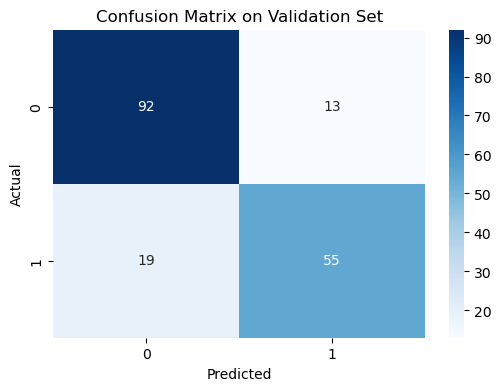

In [24]:
# Step 5: Model Evaluation on validation set
y_pred_val = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_val)
conf_matrix = confusion_matrix(y_test, y_pred_val)

print(f"Validation Accuracy: {accuracy:.2f}")

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# Step 6: Load and Preprocess Test Data
test_data = pd.read_csv('test.csv')

# Save PassengerId for submission
passenger_ids = test_data['PassengerId']

# Handle missing values in test
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)  # Test has missing Fare
test_data.drop(['Cabin'], axis=1, inplace=True)

# Feature Encoding
test_data['Sex'] = labelencoder.fit_transform(test_data['Sex'])  
test_data['Embarked'] = labelencoder.fit_transform(test_data['Embarked'])

# Drop unnecessary columns
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display preprocessed test data
print("Preprocessed Test Data Head:")
print(test_data.head())

Preprocessed Test Data Head:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2


In [26]:
# Step 7: Train on full train data for final model
model.fit(X, y)

# Step 8: Predict on test data
test_predictions = model.predict(test_data)

# Step 9: Create submission file
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


In [27]:
# Step 10: Sample predictions
print("Sample Predictions from Test Set:")
print(submission.head(10))

Sample Predictions from Test Set:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0
